In [3]:
import cvxpy as cp
import numpy as np
import osbdo as ob

# Problem description
section 4.2 in https://web.stanford.edu/~boyd/papers/os_bundle_distr_opt.html 

# Create parameters

In [4]:
params, R = ob.ra_params(num_resources=50, num_agents=50, num_participants=500)

# Distributed solution

In [5]:
agents = ob.ra_agents(params=params)
g = ob.ra_coupling(agents, R)
prob = ob.Problem(agents = agents, g = g)

In [6]:
x_agent, x_global = prob.solve(rel_gap=10**(-5), abs_gap=10**(-5), max_iter=50)

/opt/anaconda3/lib/python3.9/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


k=0, rel_gap=39.35139063169566, L=-105383.55879841809, U=-2611.646269153367
k=1, rel_gap=0.7756833518189884, L=-4637.456800975807, U=-2611.646269153367
k=2, rel_gap=0.27687886202386064, L=-4592.986041341819, U=-3597.041330970041
k=3, rel_gap=0.1419934465094661, L=-4572.347264526697, U=-4003.829687904252
k=4, rel_gap=0.09529901375930183, L=-4552.310571693969, U=-4156.226303965581
k=5, rel_gap=0.07810587500030108, L=-4541.738042806768, U=-4212.701320086489
k=6, rel_gap=0.07026348678158562, L=-4534.276522305576, U=-4236.598350132176
k=7, rel_gap=0.06649710990301111, L=-4528.013538101673, U=-4245.687584201196
k=8, rel_gap=0.06329343744316683, L=-4519.754269030815, U=-4250.712089316733
k=9, rel_gap=0.059784919917533215, L=-4510.857547847414, U=-4256.389634416033
k=10, rel_gap=0.0556171364268918, L=-4502.230373503171, U=-4265.022059742755
k=11, rel_gap=0.053833828854210425, L=-4498.165920273226, U=-4268.382544868477
k=12, rel_gap=0.04968961915811187, L=-4486.844842077522, U=-4274.44909446292

# Centralized solution

In [7]:
h_cvx, x_cvx = ob.cvx_resource_allocation(params=params, R=R)

In [8]:
h_cvx, prob.upper_bnd[-1]

(-4421.39887707044, -4402.395203577807)

# Plot

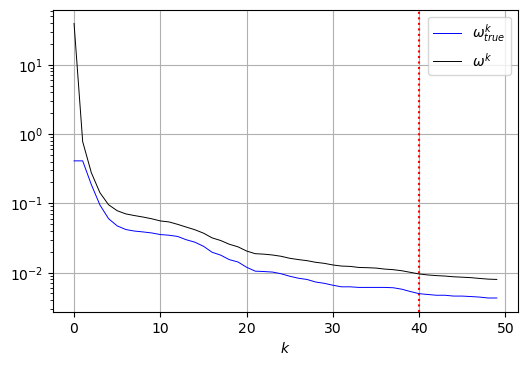

In [9]:
ob.plot_true_rel_gap_uk(lk = prob.lower_bnd, uk = prob.upper_bnd, h_true = h_cvx)